In [27]:
import numpy as np 
from scipy.stats import norm

In [1]:
import pandas as pd
dados = pd.read_csv('dados.csv')

In [2]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# <font color=green> ESTIMAÇÃO</font>
***

## <font color='red'>Problema </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

---

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

## <font color=green>4.1 Teorema do limite central</font>
***

> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

### Entendendo o Teorema do Limite Central

In [3]:
n = 2000
total_de_amostra = 1500

In [4]:
amostras = pd.DataFrame()
amostras

""


In [5]:
for i in range(total_de_amostra):
    _ = dados.Idade.sample(n)
    _.index = range(0, len(_))
    amostras['Amostra_' + str(i)] = _
    
amostras

C:\Users\ANALUI~1\AppData\Local\Temp/ipykernel_41260/1387074322.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _


,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,55,67,65,46,54,55,51,34,40,31,...,36,31,32,48,61,21,75,54,55,33
1,50,58,32,32,65,57,28,41,58,34,...,48,53,49,54,28,31,39,37,60,54
2,48,60,45,46,43,17,72,53,42,39,...,48,49,26,74,38,40,37,64,31,44
3,29,30,56,53,68,44,44,34,38,56,...,52,56,43,45,37,36,36,40,30,46
4,42,54,28,70,46,55,31,44,26,36,...,39,61,43,69,51,65,47,49,46,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,56,33,56,26,24,33,25,53,44,63,...,40,33,49,36,49,37,55,30,32,37
1996,27,42,39,30,43,73,19,30,45,48,...,54,46,33,60,18,42,46,45,37,61
1997,38,34,49,42,52,29,43,50,33,28,...,22,27,62,23,37,35,32,51,39,42
1998,59,30,44,48,62,55,63,59,74,52,...,44,45,49,46,32,46,28,55,36,32


In [7]:
amostras.mean()

Amostra_0       44.1360
Amostra_1       43.7420
Amostra_2       43.9675
Amostra_3       43.9070
Amostra_4       43.0960
                 ...   
Amostra_1495    44.2055
Amostra_1496    43.7980
Amostra_1497    43.5950
Amostra_1498    43.9965
Amostra_1499    44.0735
Length: 1500, dtype: float64

> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

<AxesSubplot:>

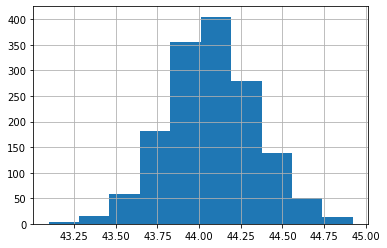

In [9]:
amostras.mean().hist()

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [10]:
dados.Idade.mean()

44.07142113482561

In [12]:
amostras.mean().mean()

44.072677666666685

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [13]:
amostras.mean().std()

0.2711251306910096

In [14]:
dados.Idade.std()

12.480583465360187

In [16]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

## <font color=green>4.2 Níveis de confiança e significância</font>
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## <font color=green>4.3 Erro inferencial</font>
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confiança</font>
***

### Intevalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Exemplo: </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

### Média amostral

In [35]:
media_amostra = 5050

### Nível de significância ($\alpha$)

In [18]:
significancia = 0.05

### Nível de confiança ($1 - \alpha$)

In [20]:
confianca = 1 - significancia
confianca

0.95

### Obtendo $z$

### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [21]:
0.95 / 2

0.475

In [24]:
0.5 + (0.95 / 2)

0.975

In [25]:
1.9 + 0.06

1.96

In [28]:
z = norm.ppf(0.975)
z

1.959963984540054

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

### Obtendo $\sigma_\bar{x}$

In [29]:
desvio_padrao = 150

In [30]:
n = 20 

In [32]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [33]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684


### Obtendo $e$

In [34]:
e = z * sigma
e

65.73919054324361

### Solução 1 - Calculando o intervalo de confiança para a média

In [38]:
# forma manual 
intervalo = (
    media_amostra - e,
    media_amostra + e,
)
intervalo

(4984.260809456757, 5115.739190543243)

### Solução 2 - Calculando o intervalo de confiança para a média

In [40]:
# Em código
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

## Exercicio 1:
---
Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [46]:
n = 50

In [47]:
desvio_padrao = 6

In [48]:
z = norm.ppf(0.975)

In [49]:
e = z * (desvio_padrao / np.sqrt(n))
e

1.6630845892196133

## Exercicio 2:
---
Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [50]:
media_amostra = 28

In [52]:
n = 1976

In [53]:
raiz_de_n = np.sqrt(n)
raiz_de_n

44.45222154178574

In [51]:
desvio_padrao = 11

In [54]:
sigma = desvio_padrao / raiz_de_n
sigma

0.24745669886621613

In [56]:
norm.interval(alpha = 0.90, loc = media_amostra, scale = sigma)

(27.592969951356466, 28.407030048643534)